# Labo 8
Opérations morphologiques binaires et en niveaux de gris

In [1]:
from skimage import data, morphology
import matplotlib.pyplot as plt
import numpy as np

## Exercice 1
Aller chercher les contours dans une image à l'aide d'une érosion

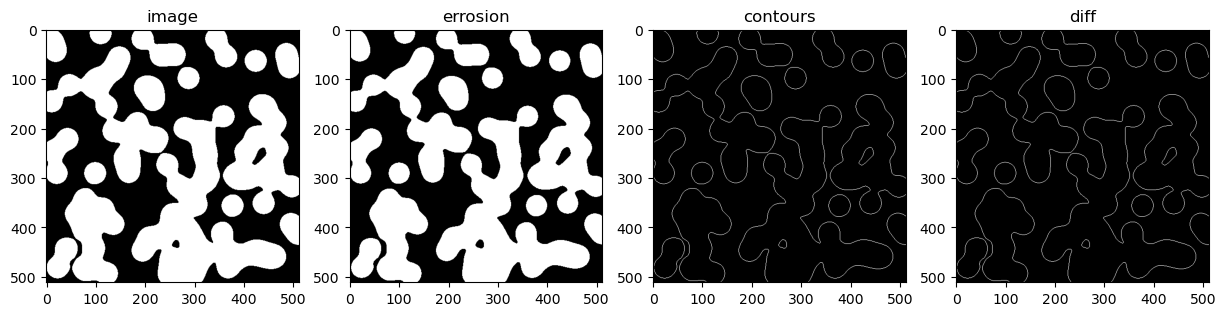

In [9]:
img = data.binary_blobs()

plt.figure(figsize=(15,15))

plt.subplot(141); plt.imshow(img, cmap='gray'); plt.title('image')

h = [[0, 1, 0],
    [1, 1, 1],
    [0, 1, 0]]
h = np.array(h)

errosion = morphology.binary_erosion(img, h)
plt.subplot(142); plt.imshow(errosion, cmap='gray'); plt.title('errosion')

contours = np.logical_xor(img, errosion)
plt.subplot(143); plt.imshow(contours, cmap='gray'); plt.title('contours')

diff = img.astype(np.uint8) - errosion.astype(np.uint8)
plt.subplot(144); plt.imshow(diff, cmap='gray'); plt.title('diff')

plt.show()

## Exercice 2
Faire une dilatation géodésique avec un masque de sorte à reconstruire des blobs à partir d'un point (seed)

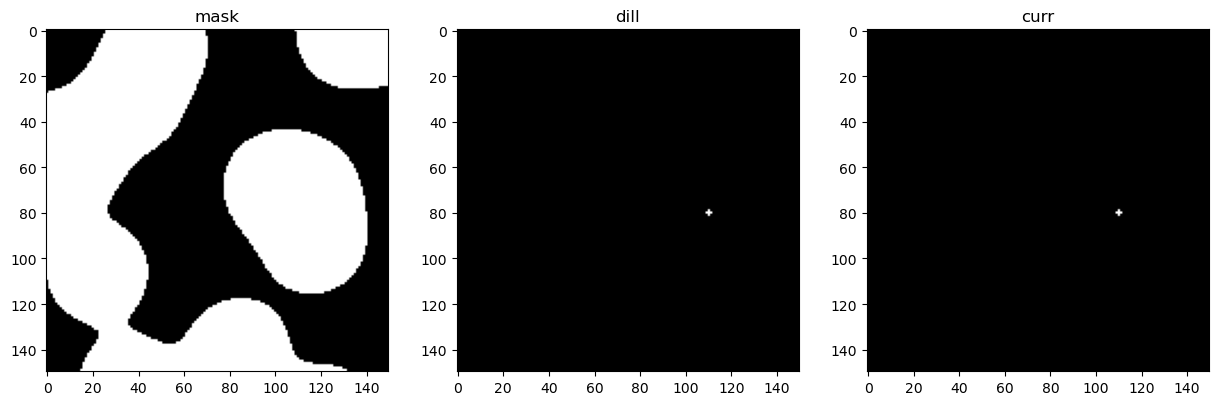

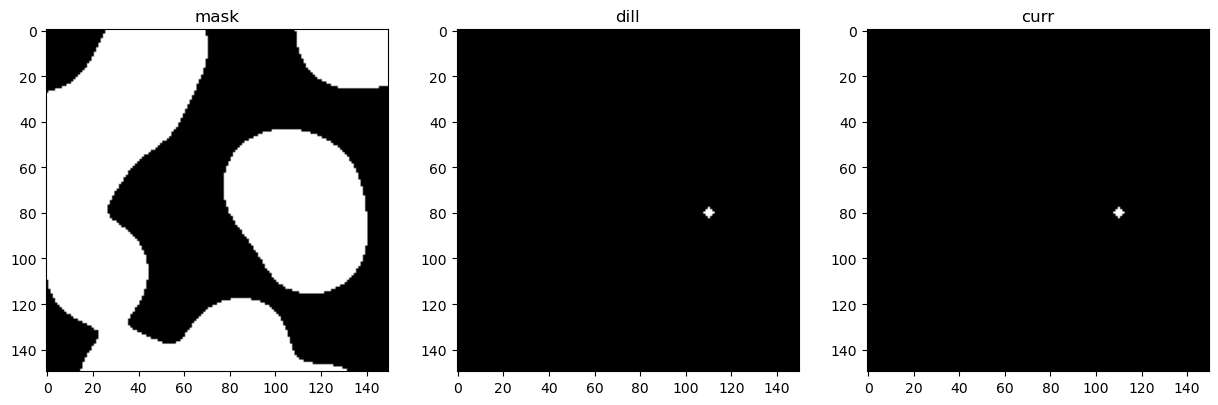

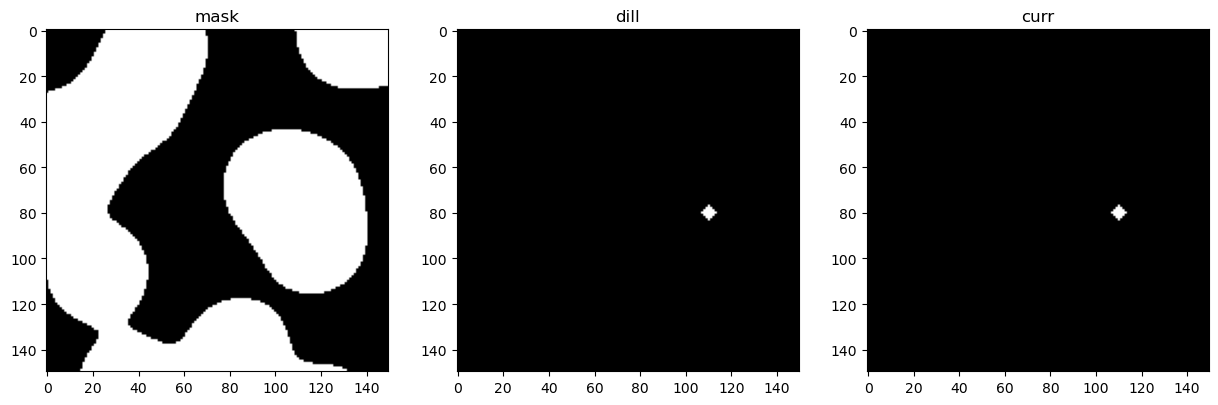

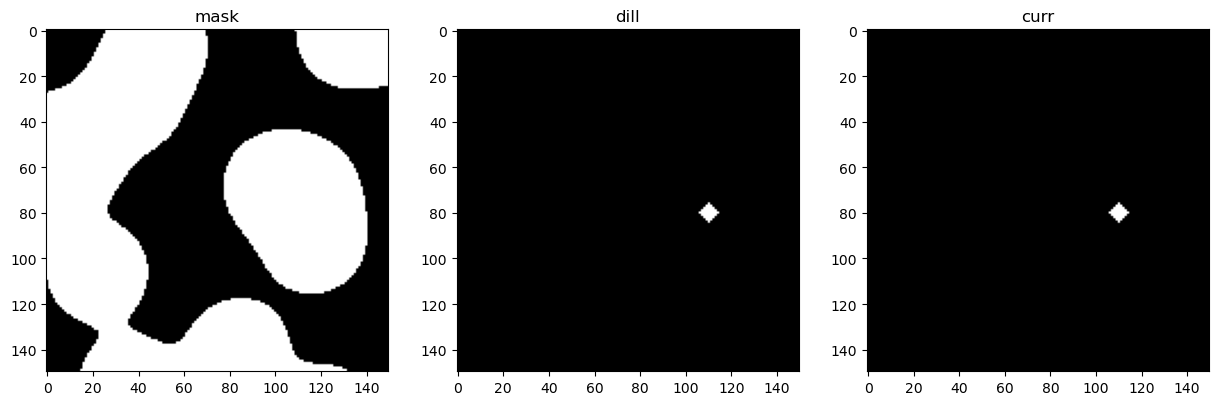

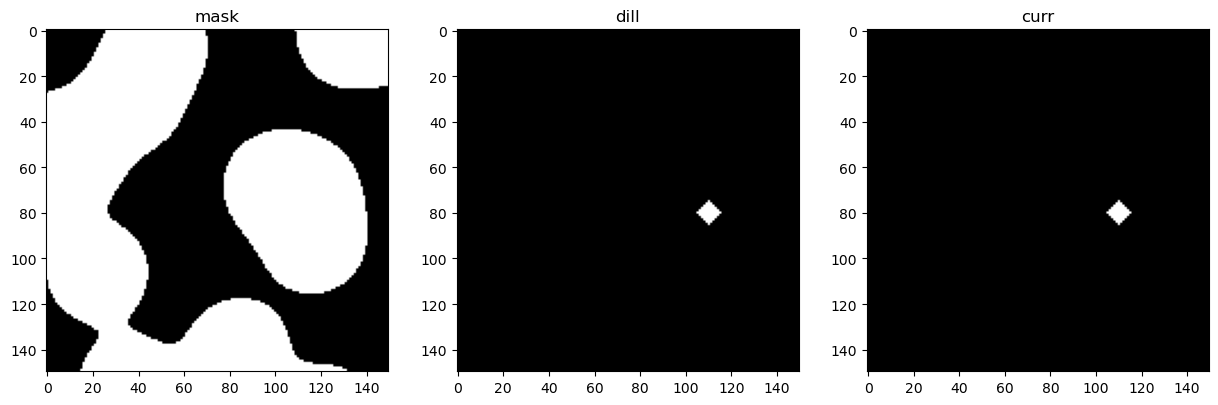

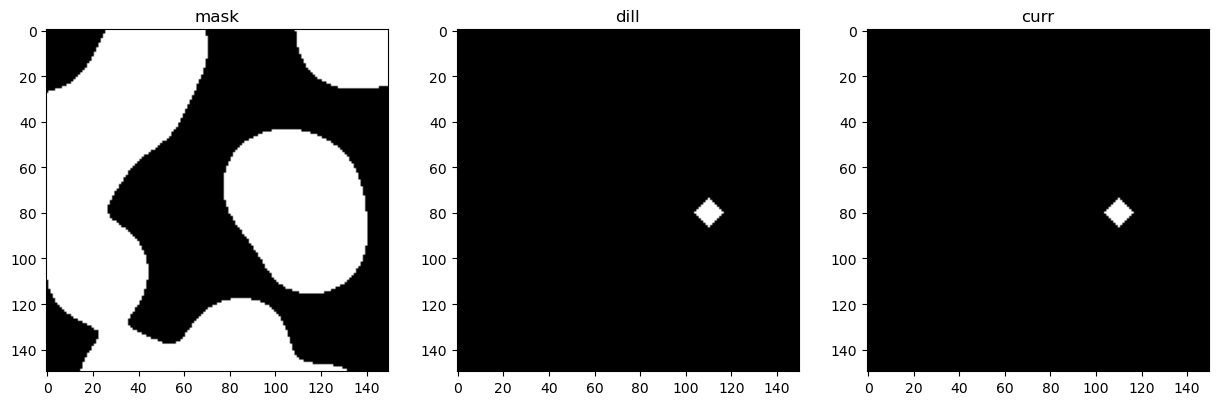

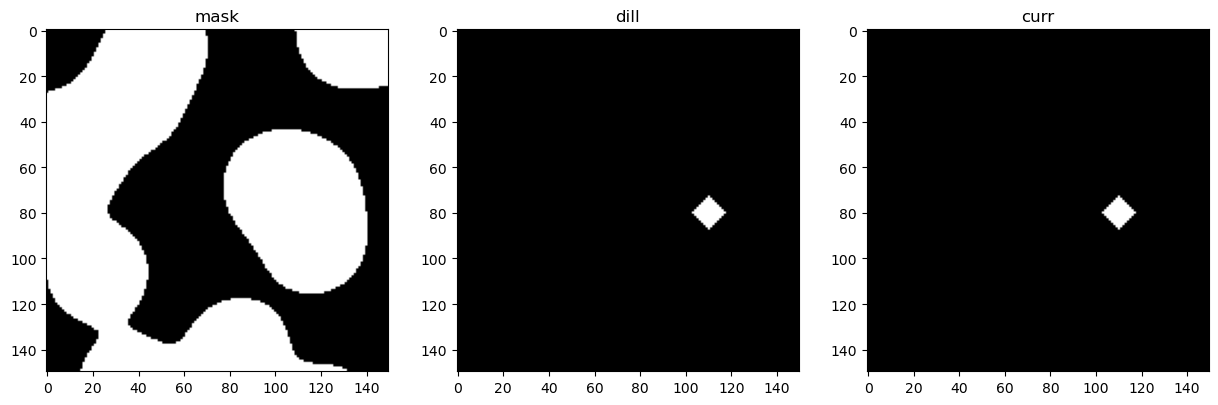

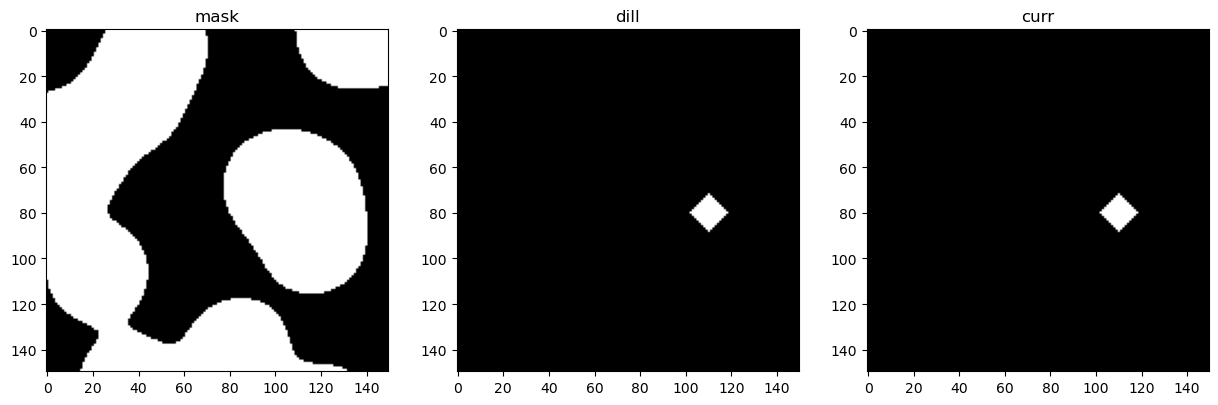

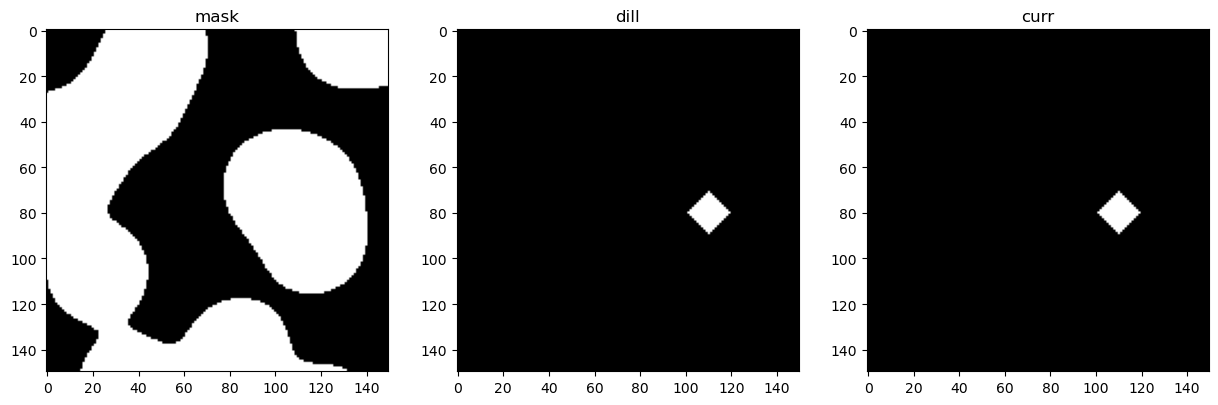

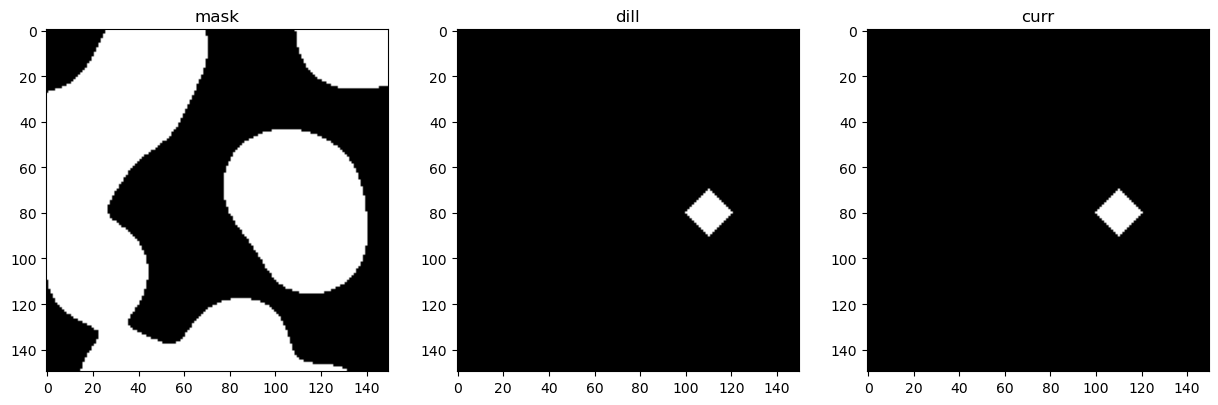

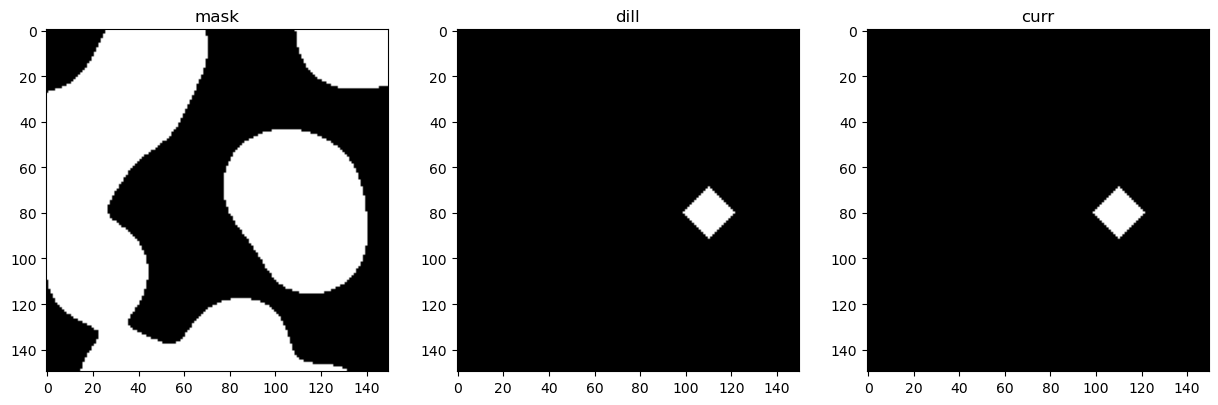

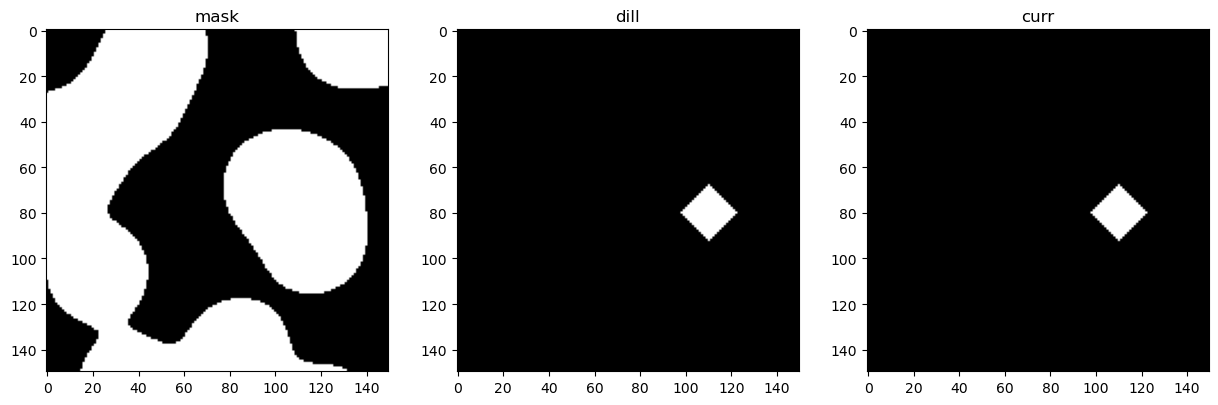

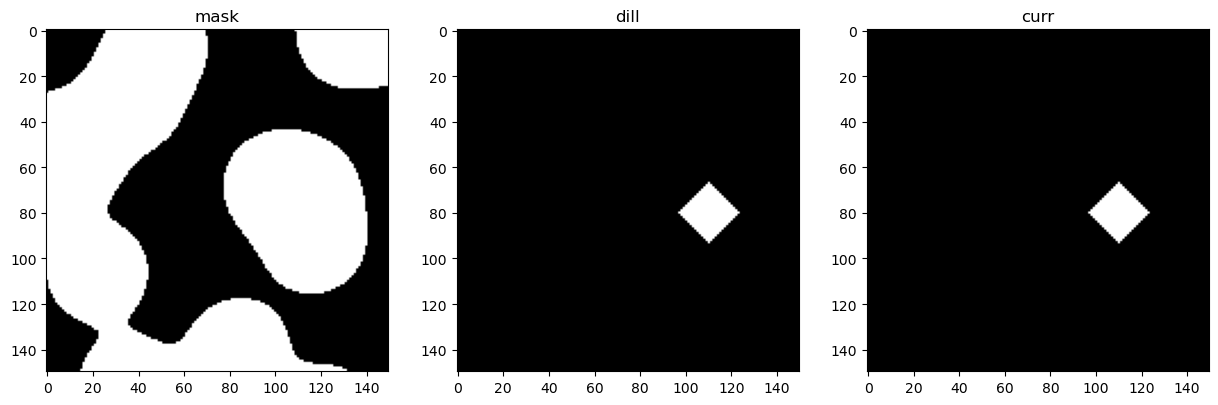

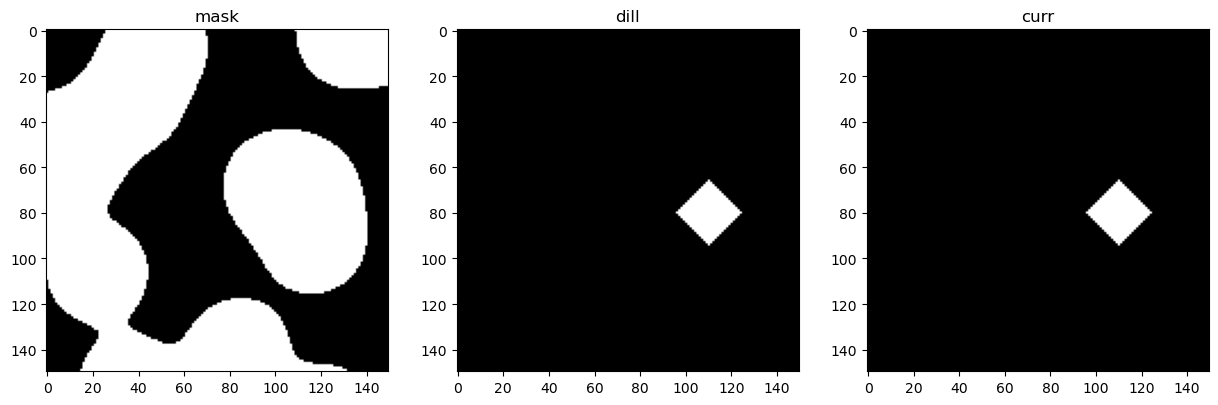

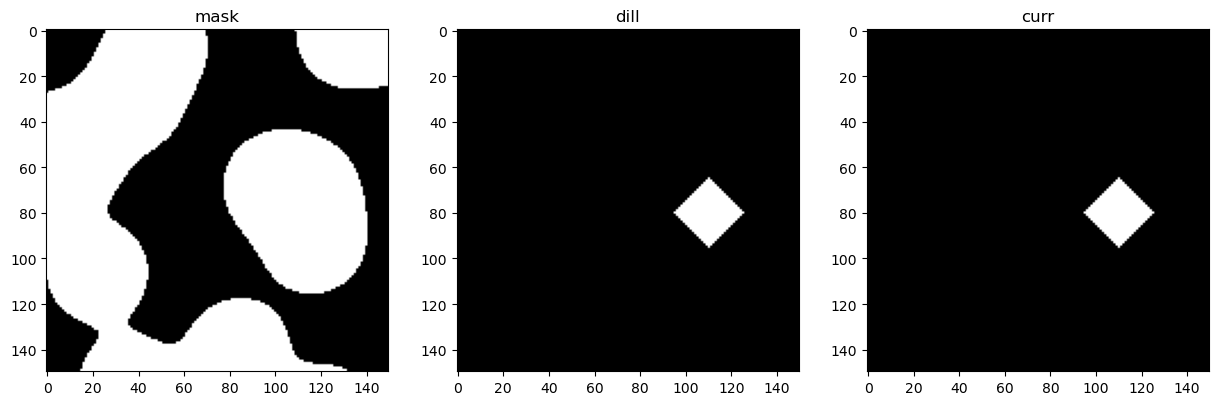

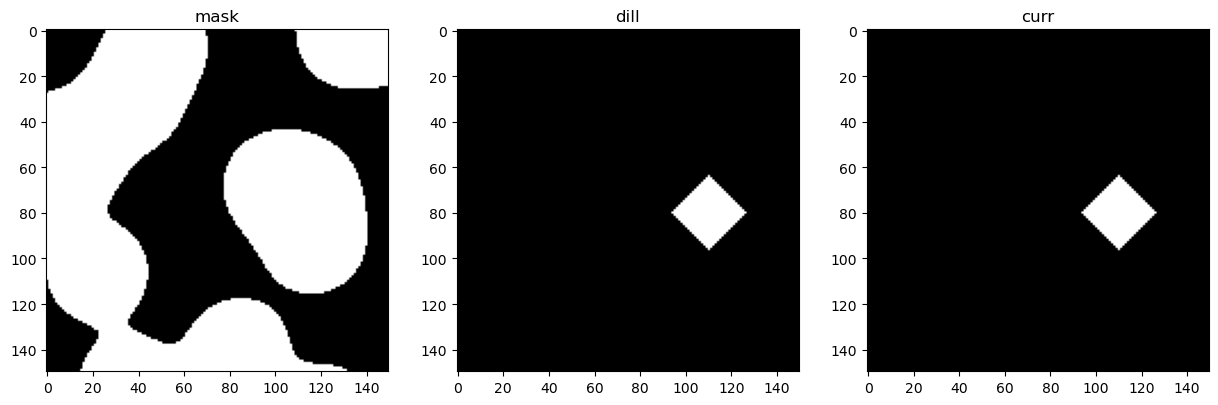

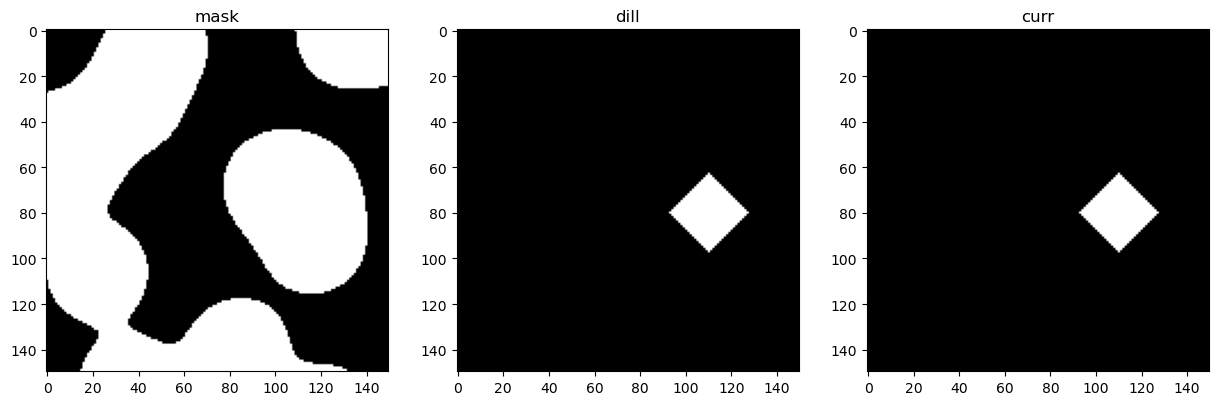

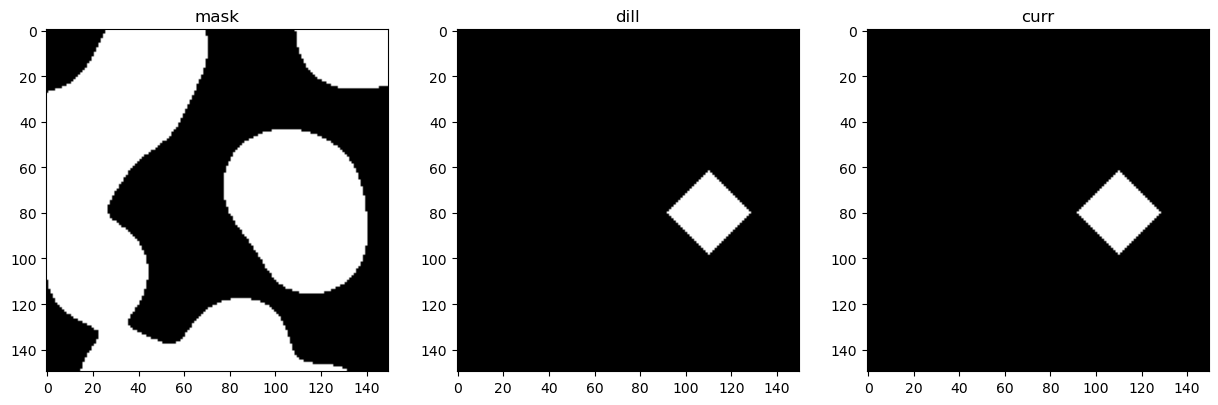

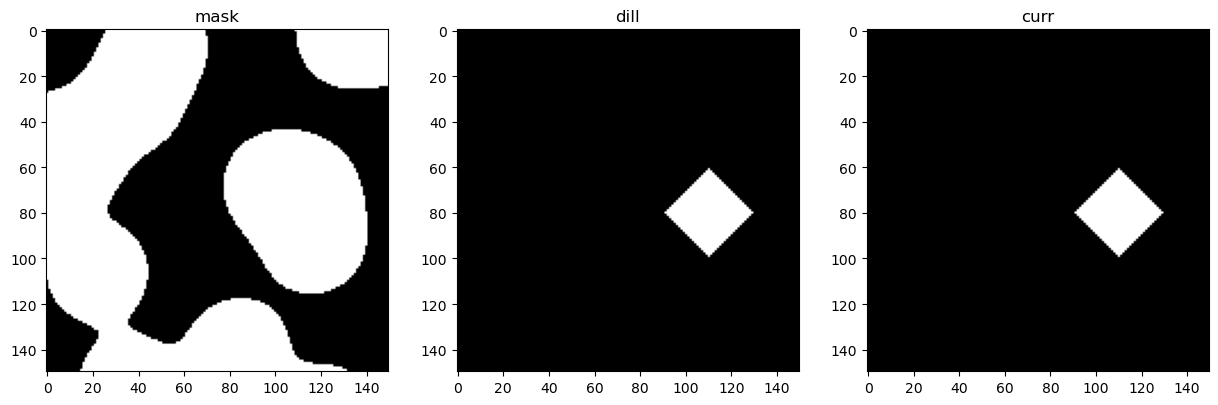

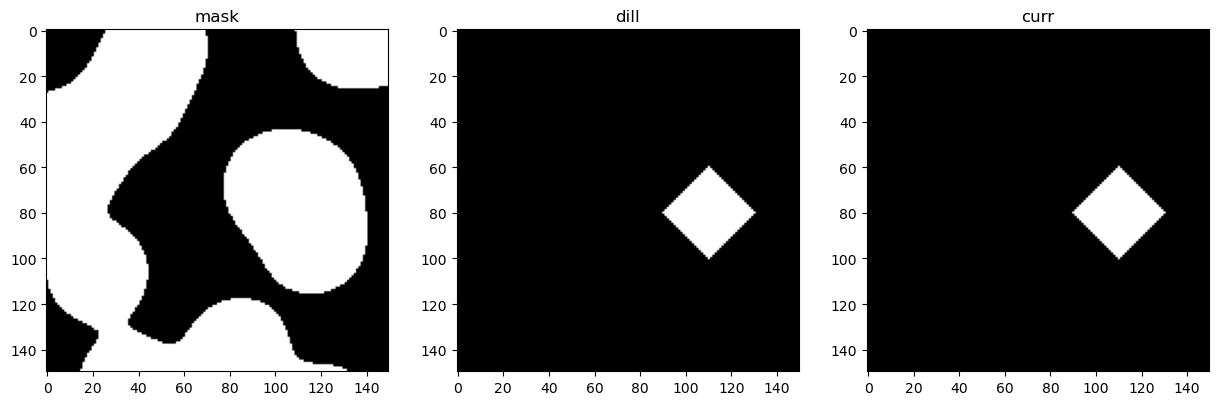

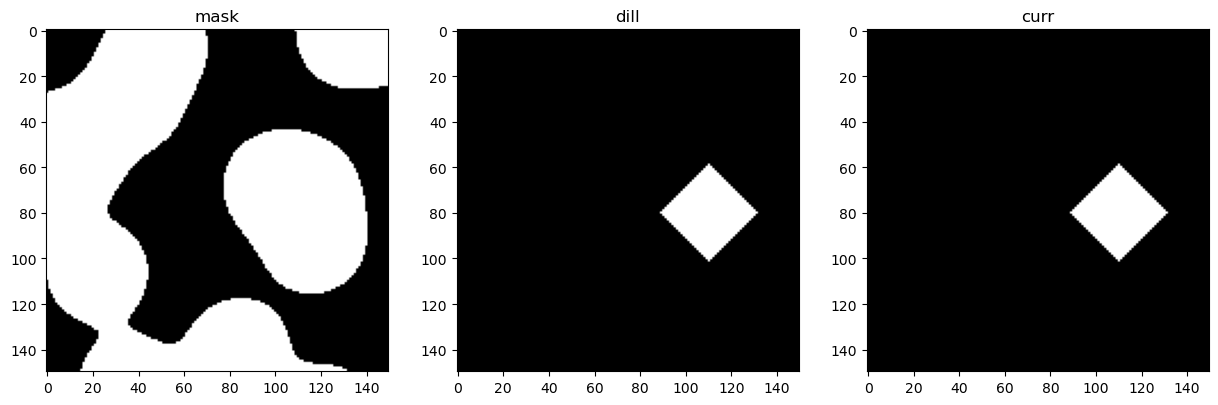

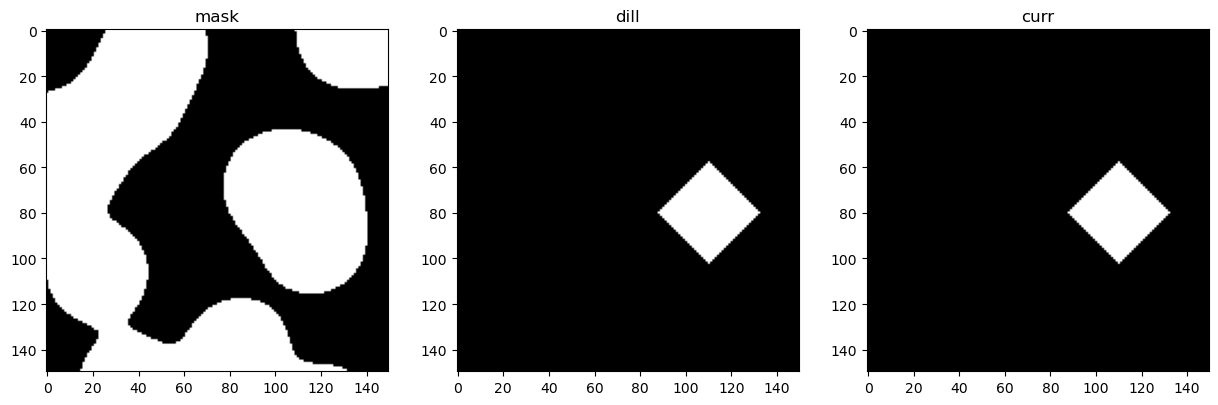

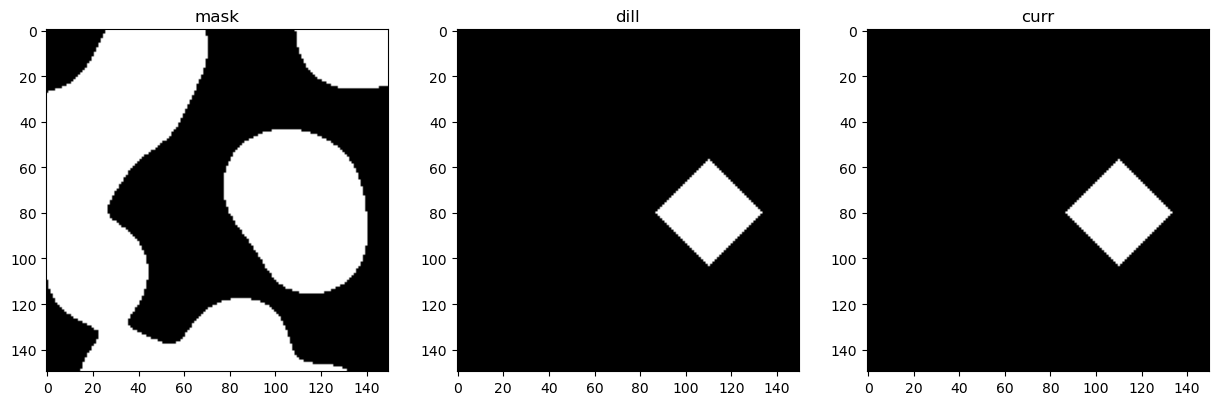

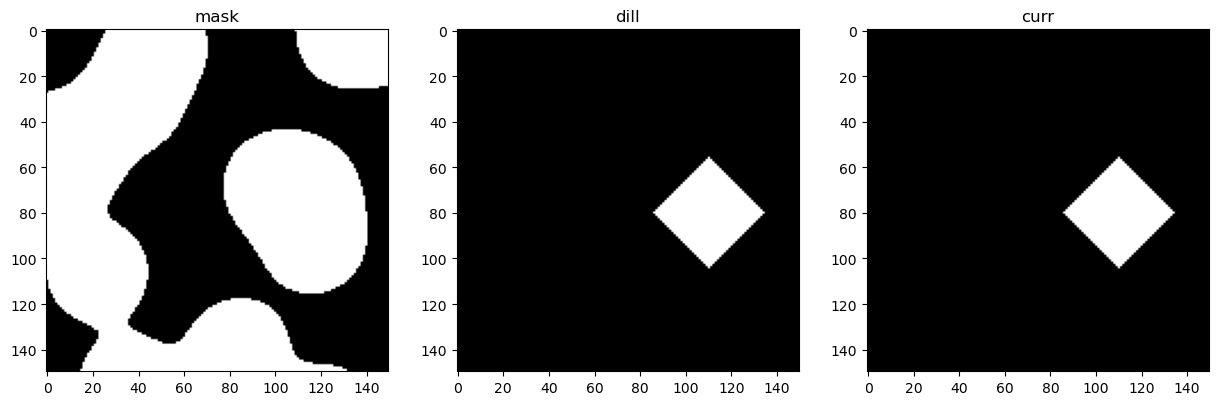

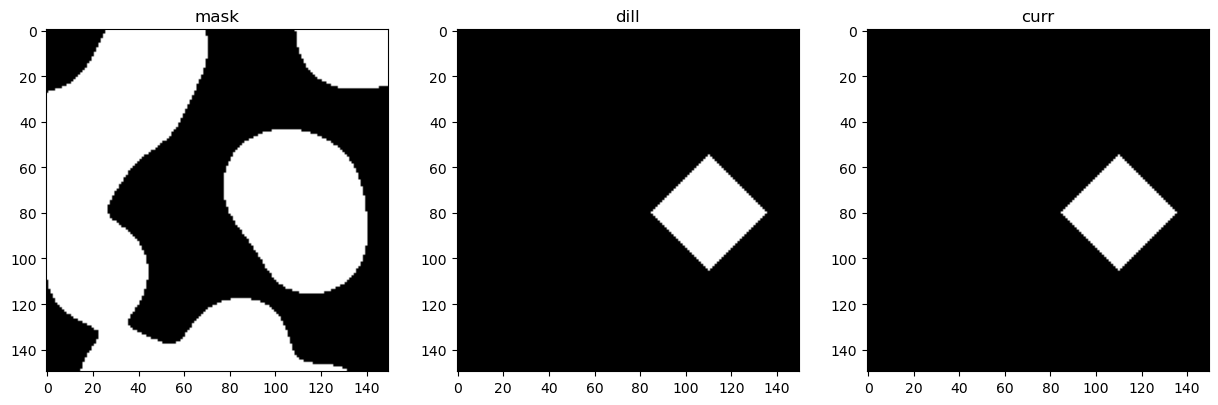

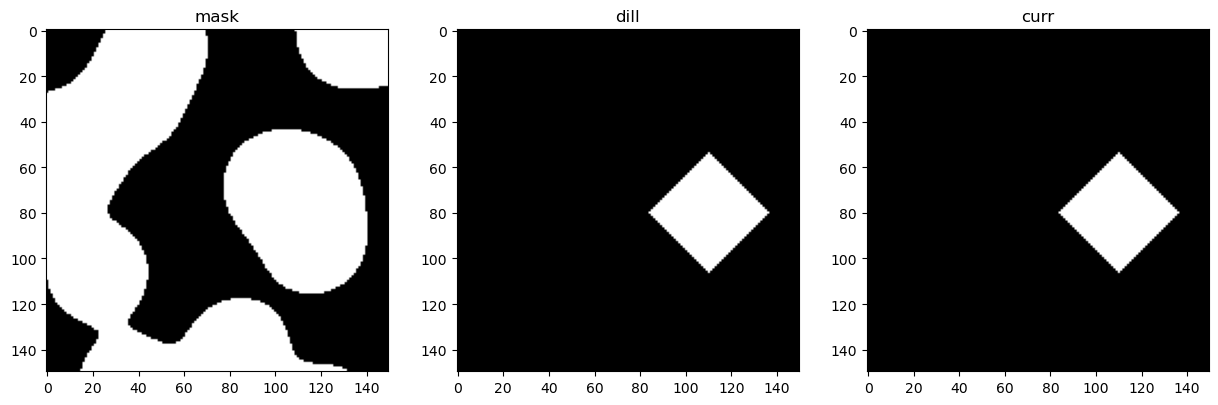

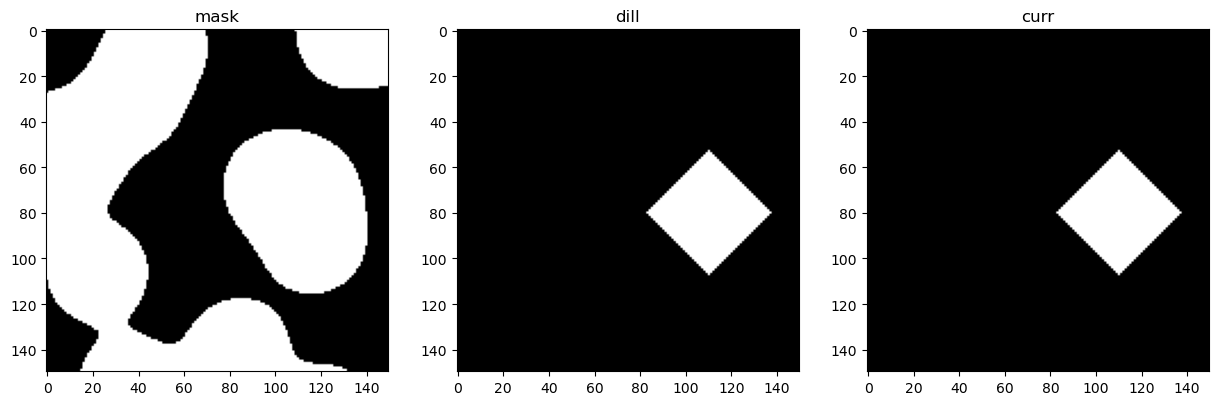

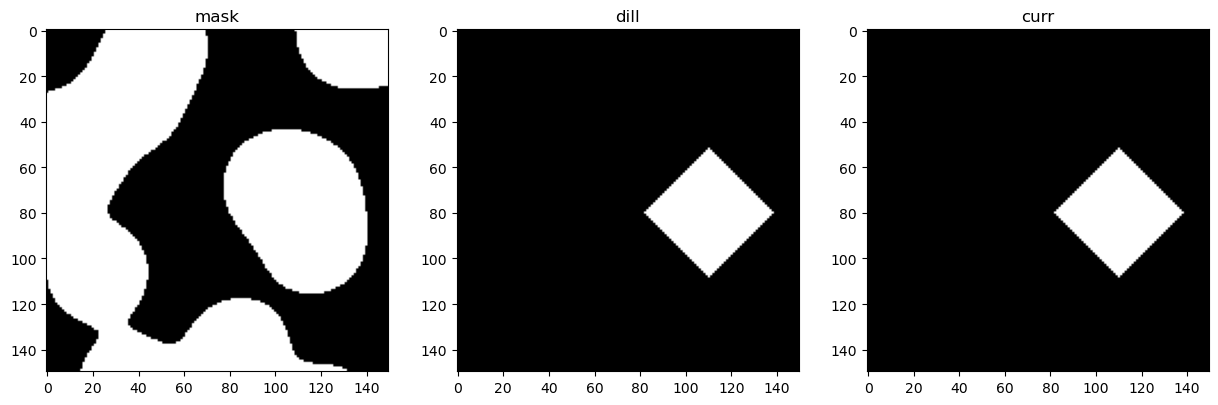

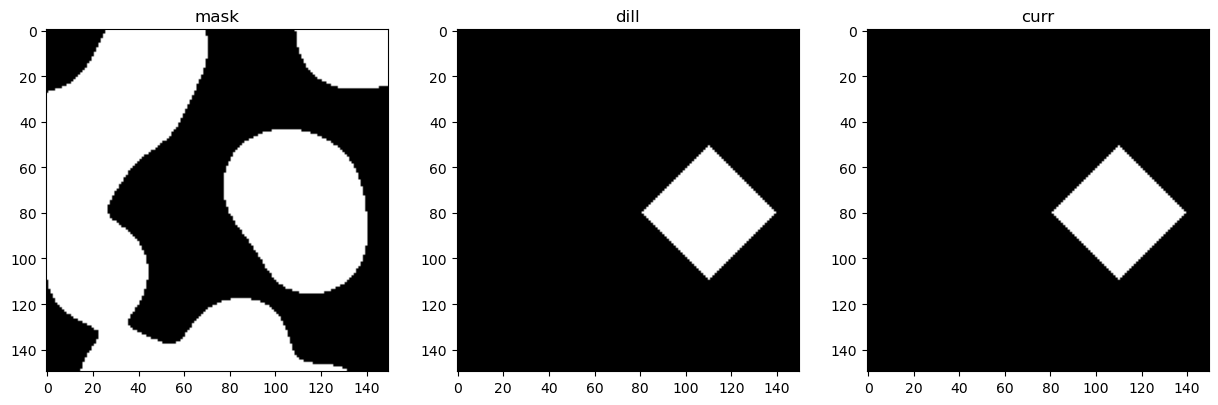

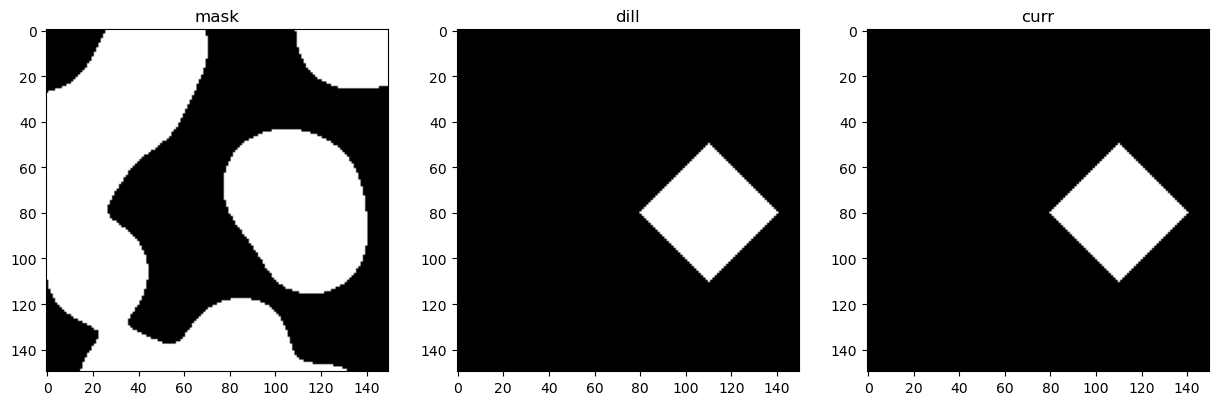

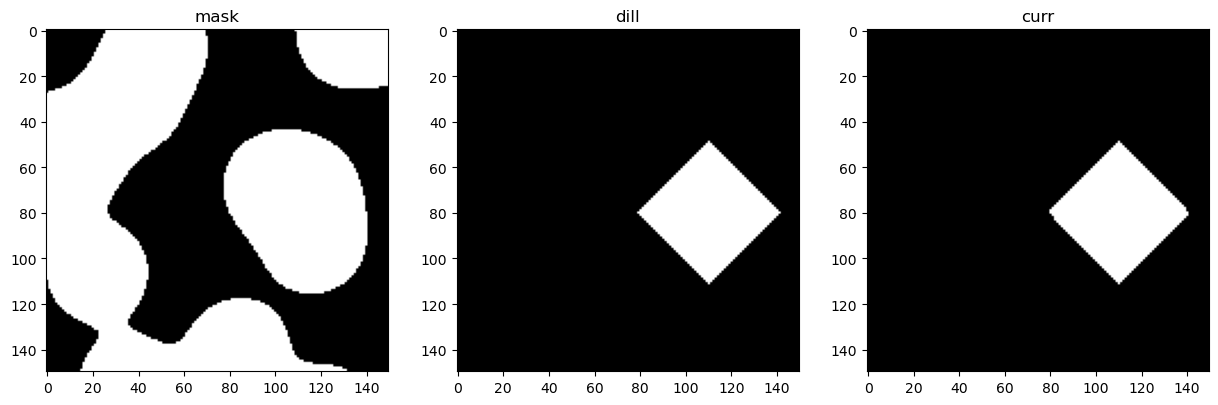

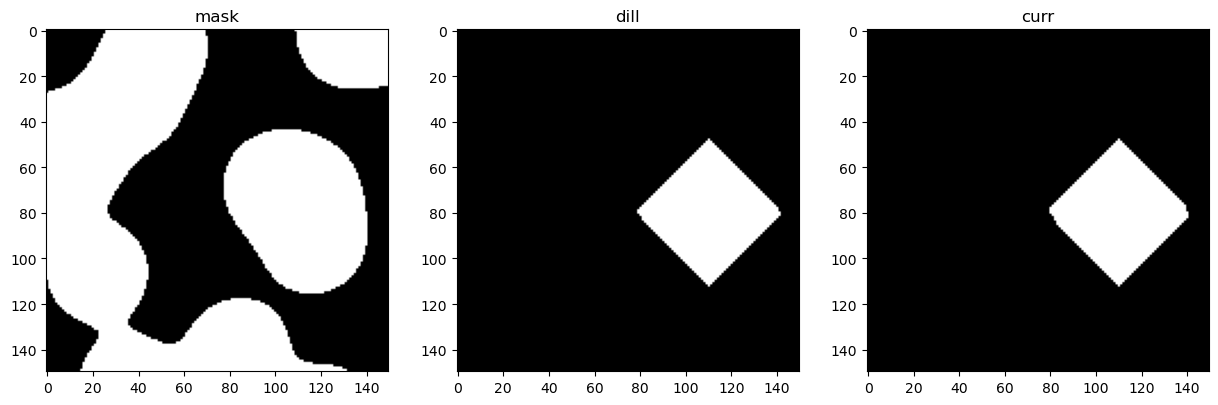

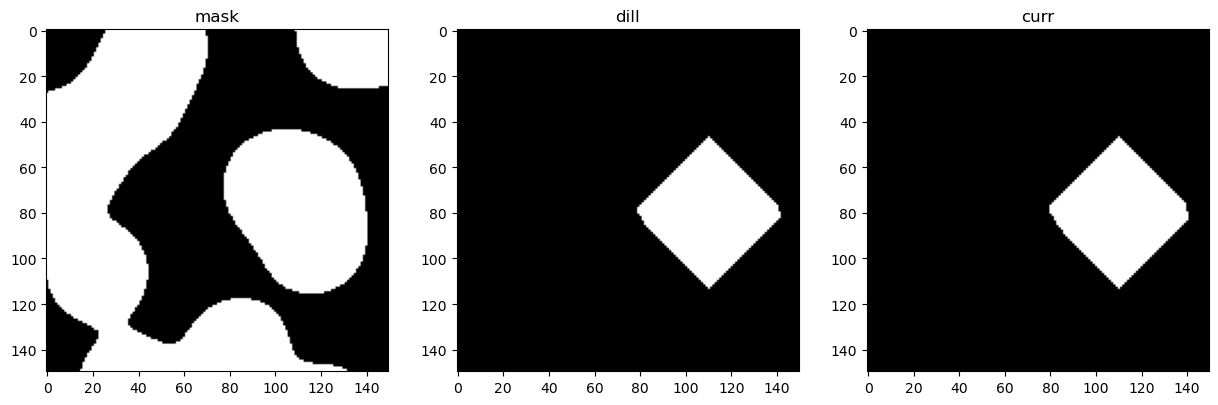

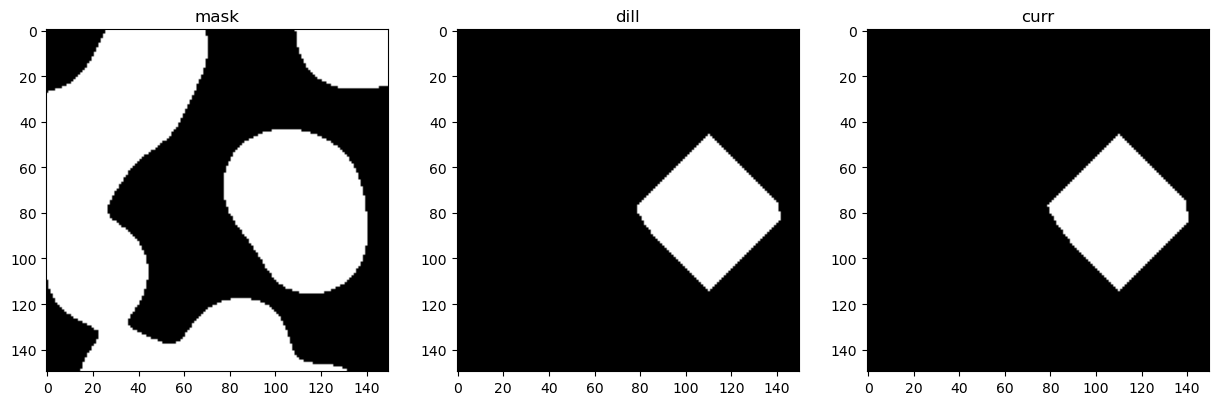

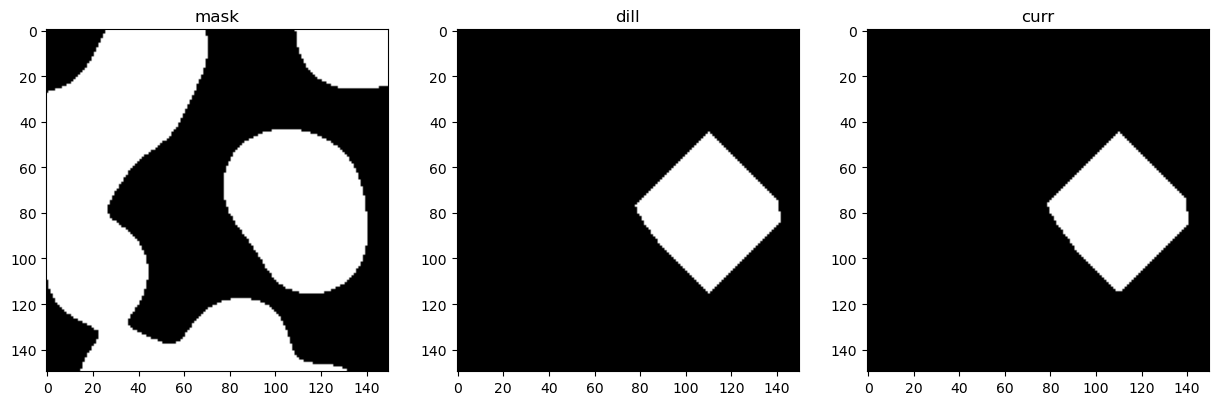

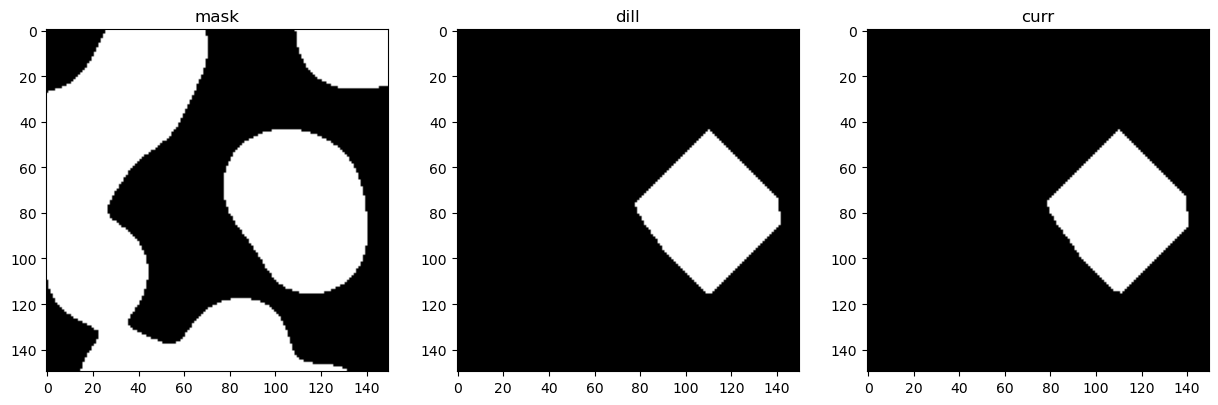

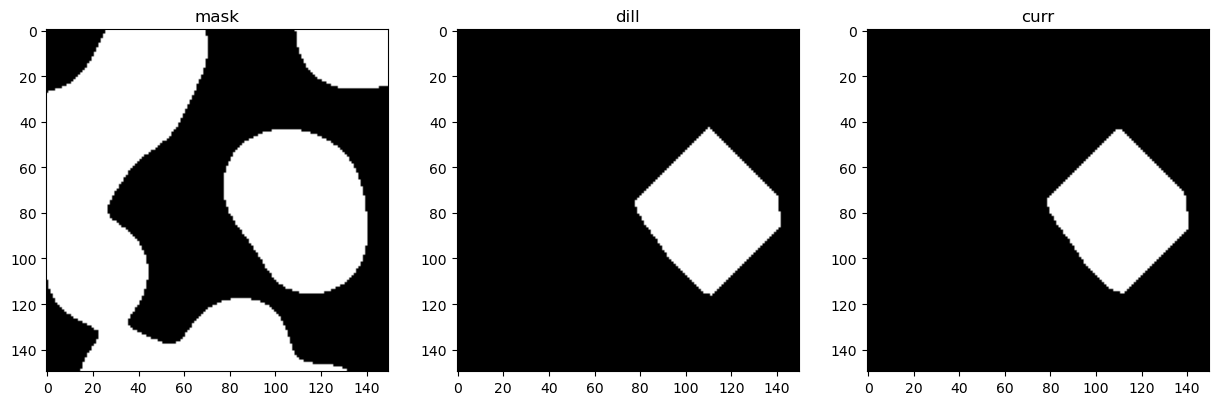

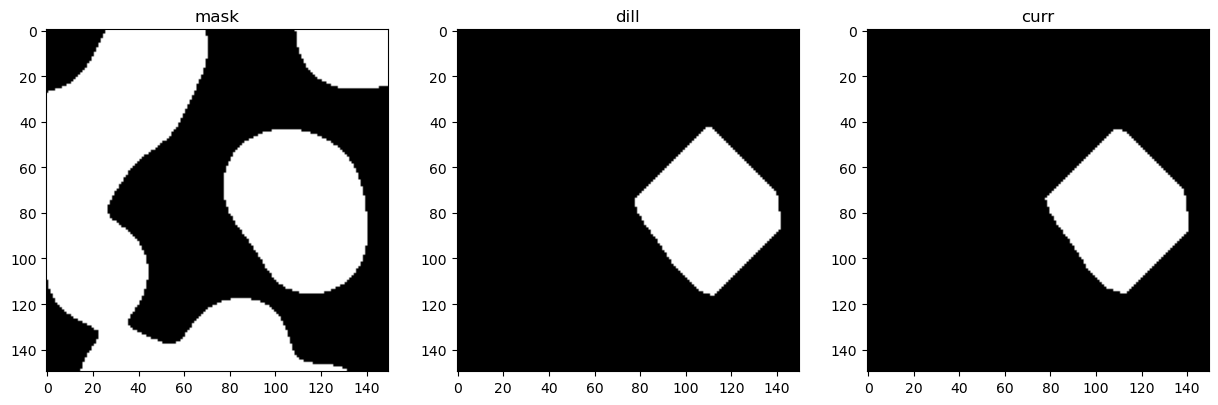

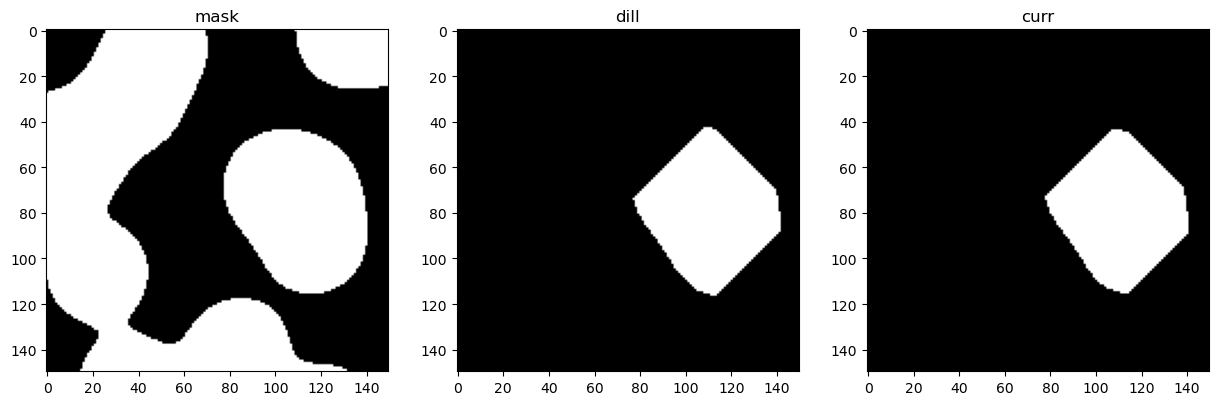

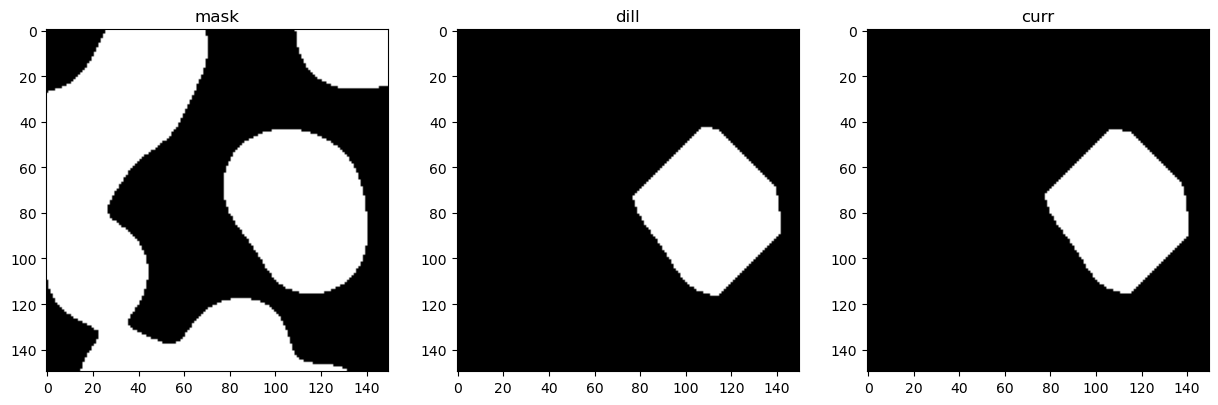

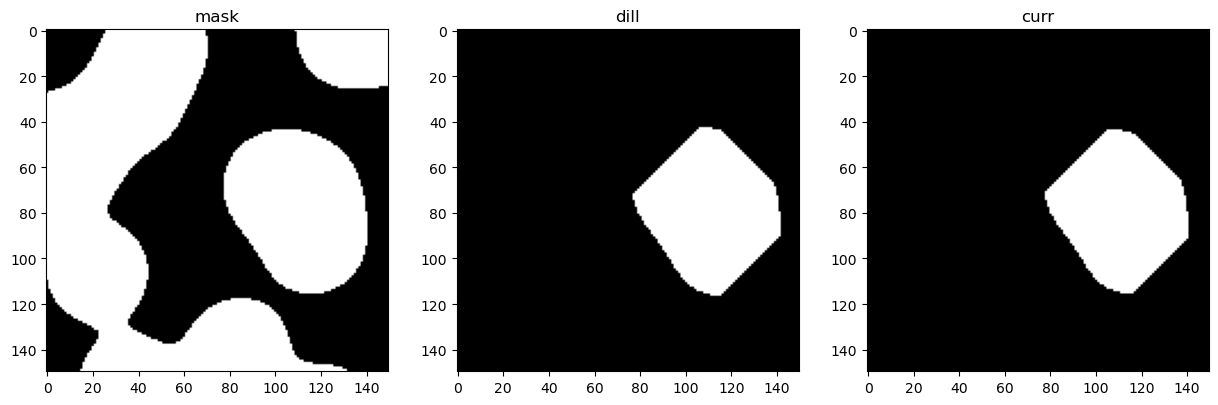

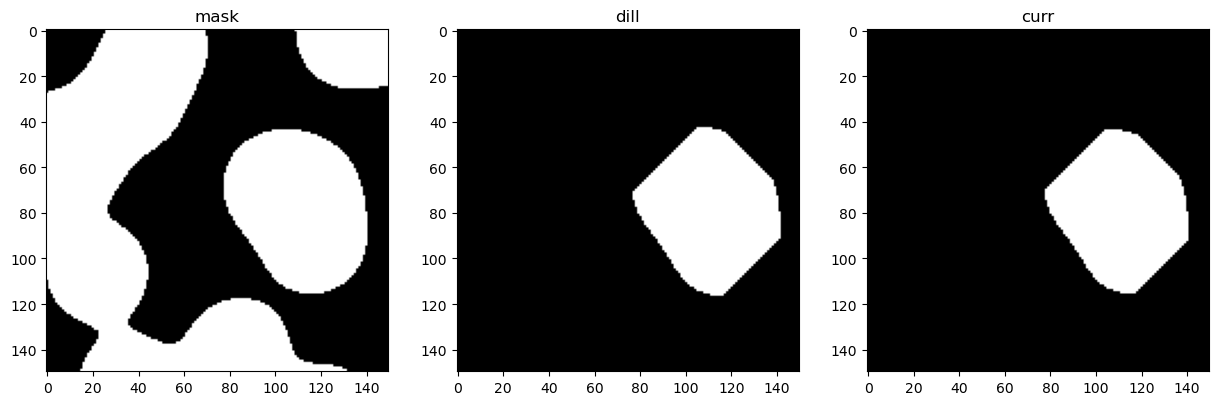

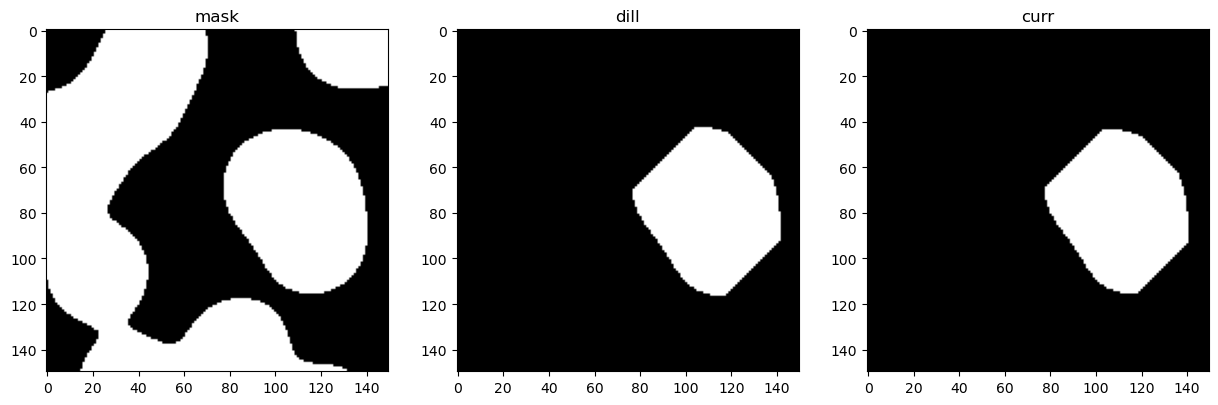

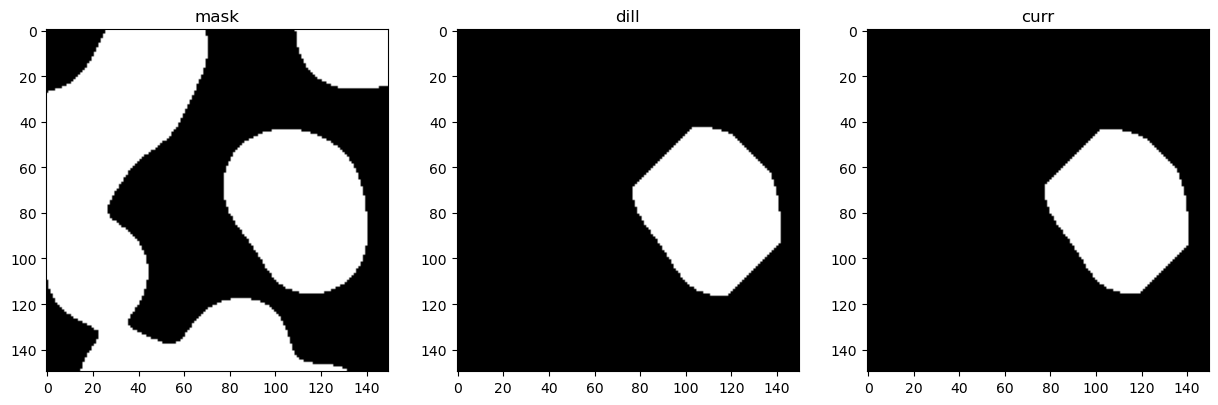

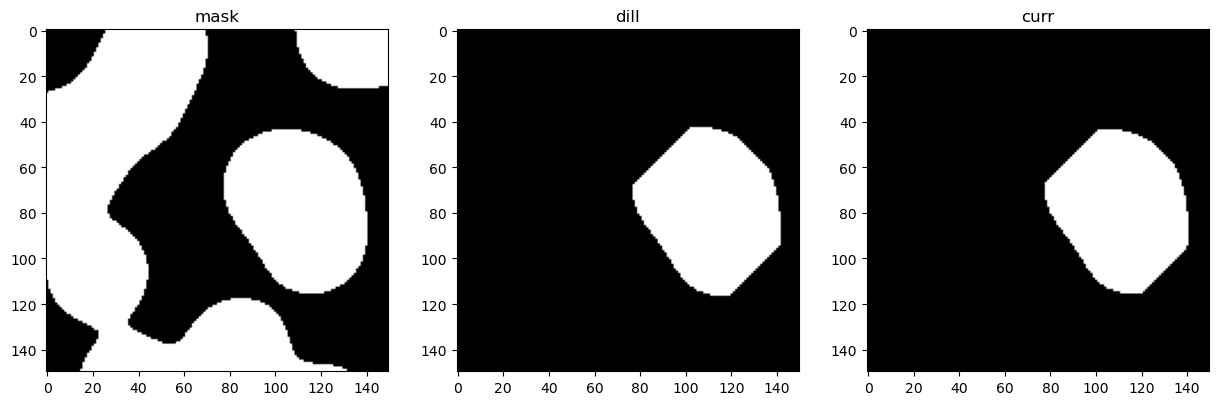

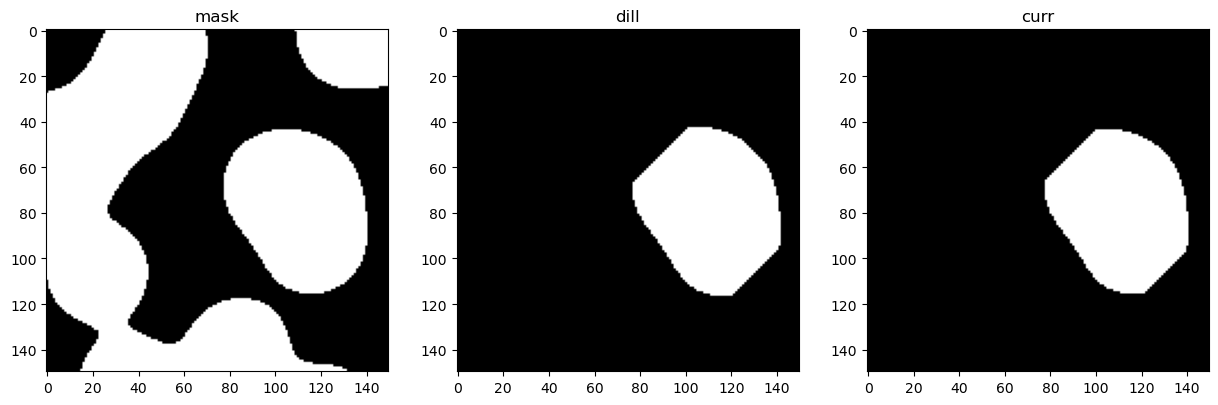

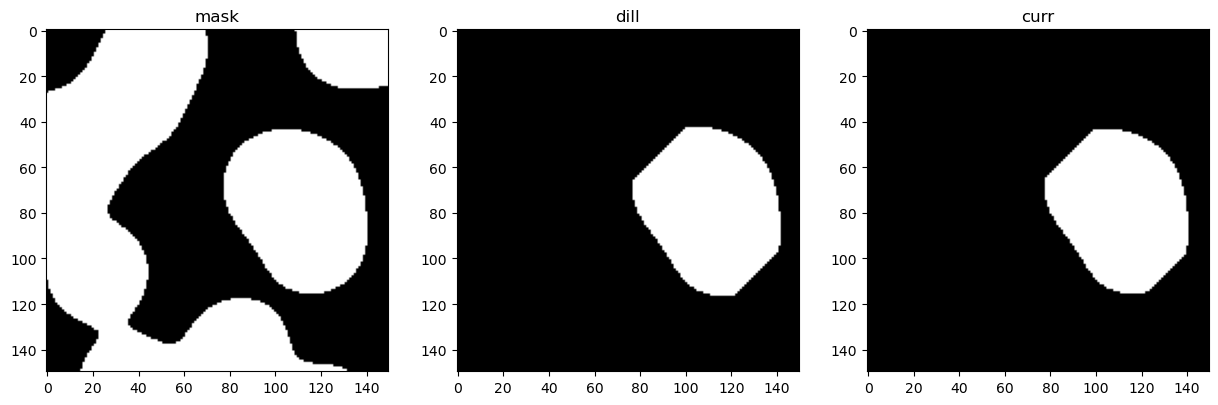

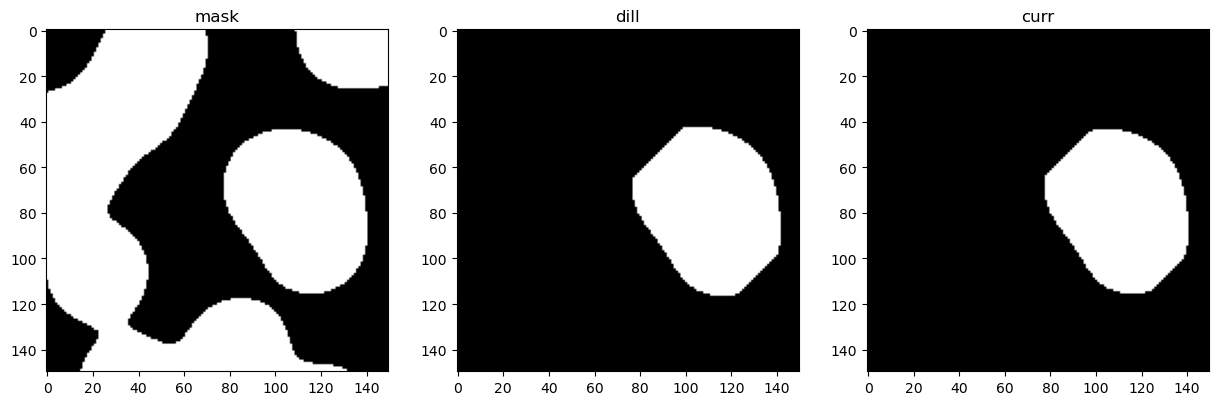

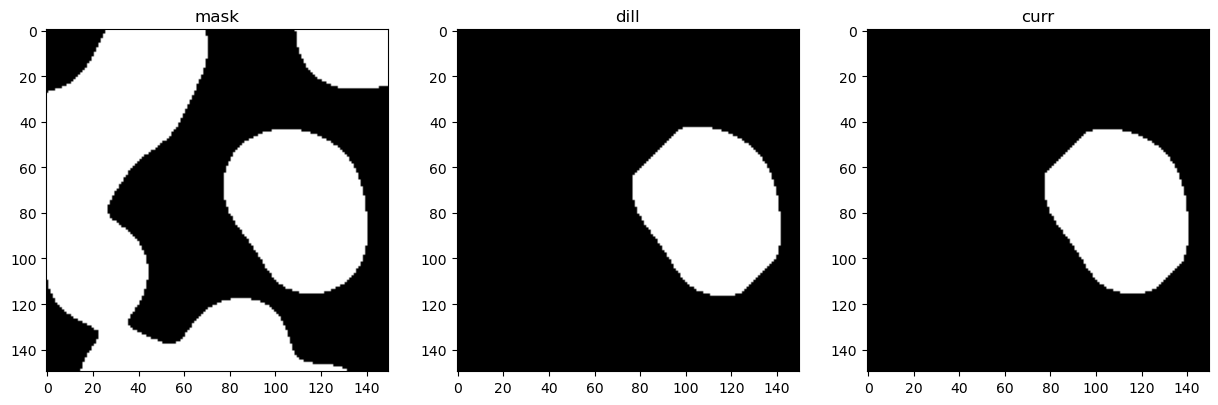

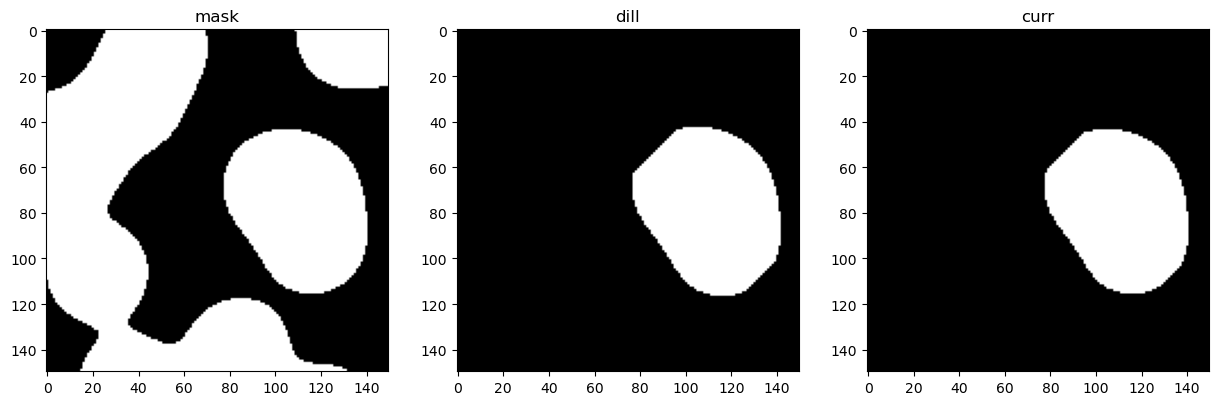

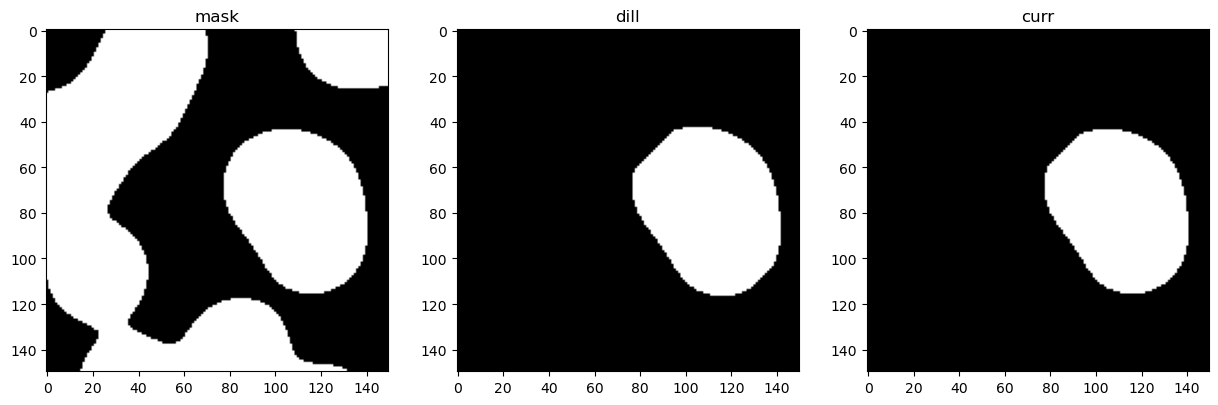

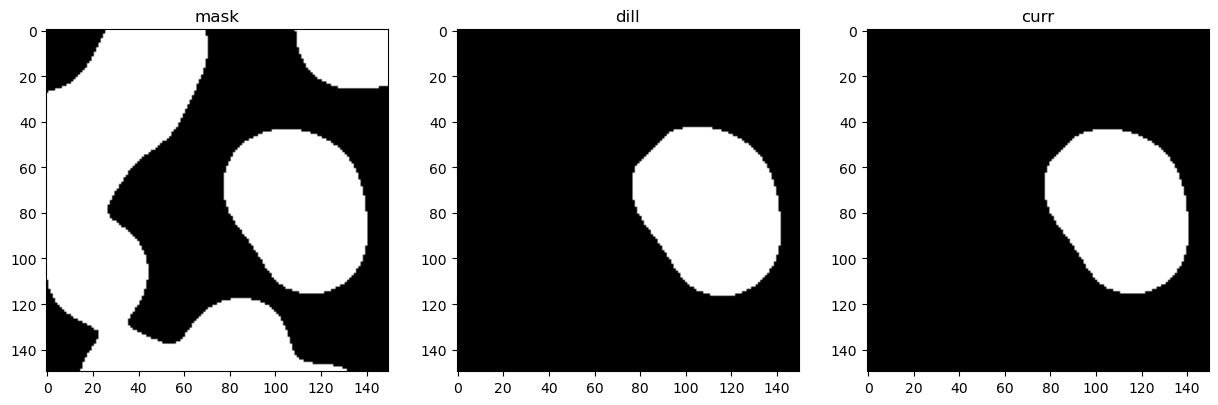

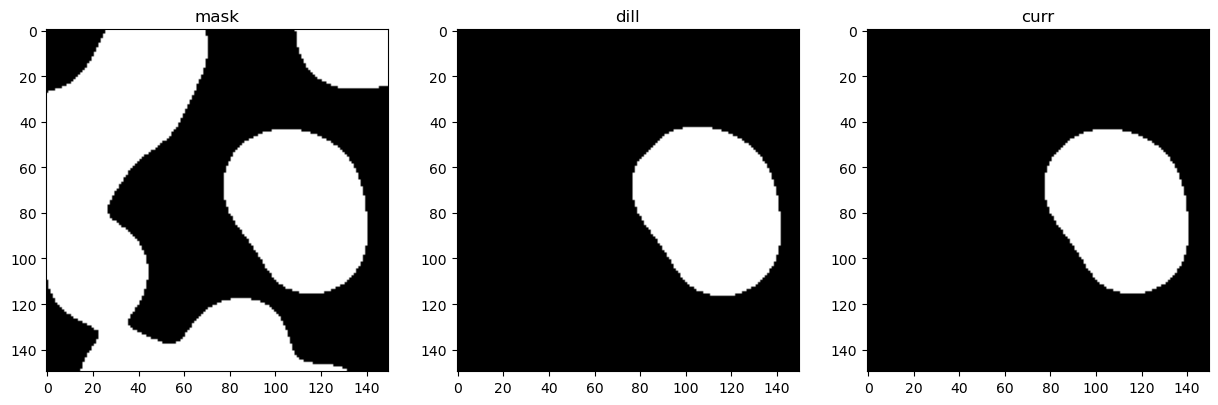

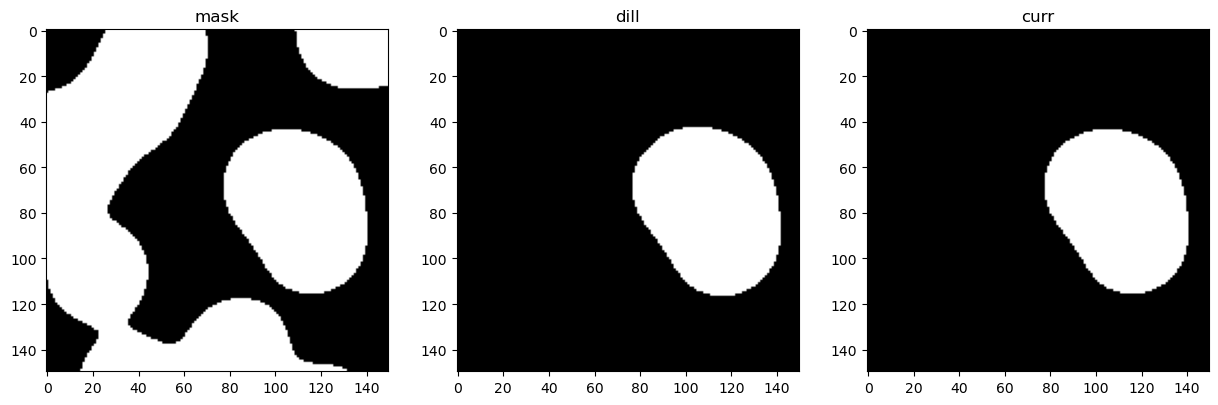

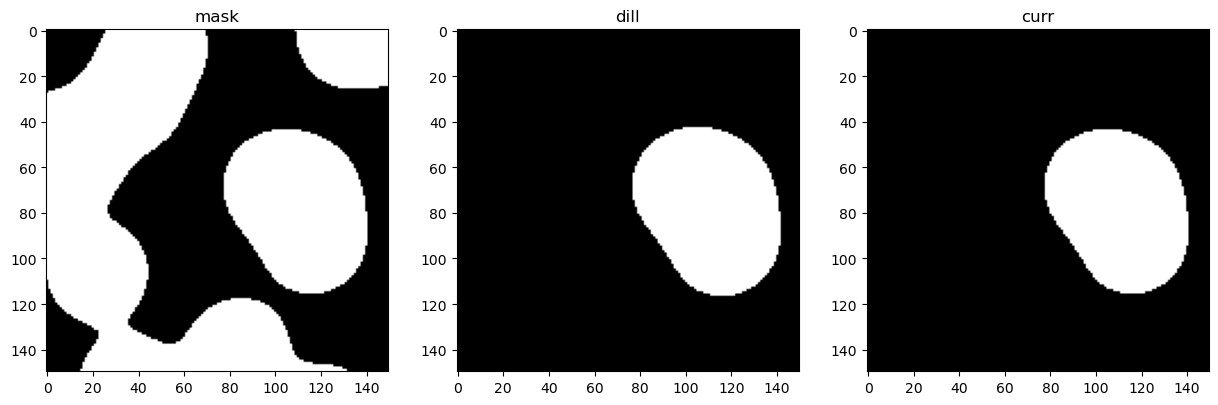

In [17]:
mask = img[50:200, 100:250]
seed = np.zeros_like(mask)
seed[80, 110] = 1
h = [[0, 1, 0],
     [1, 1, 1],
     [0, 1, 0]]
h = np.array(h)

# plt.figure(figsize=(15,15))
# plt.subplot(131); plt.imshow(mask, cmap='gray'); plt.title('mask')
# plt.subplot(132); plt.imshow(seed, cmap='gray'); plt.title('seed')

prev = np.zeros_like(seed)
curr = seed.copy()

while np.not_equal(prev, curr).any():
     prev = curr.copy()
     dill = morphology.binary_dilation(curr, h)
     curr = np.logical_and(dill, mask)
     plt.figure(figsize=(15,15))
     plt.subplot(131); plt.imshow(mask, cmap='gray'); plt.title('mask')
     plt.subplot(132); plt.imshow(dill, cmap='gray'); plt.title('dill')
     plt.subplot(133); plt.imshow(curr, cmap='gray'); plt.title('curr')
     plt.show()

# plt.subplot(133); plt.imshow(curr, cmap='gray'); plt.title('apres dillatation')
# plt.show()

## Exercice 3
Faire une fermeture avec notre image afin de retirer les blobs plus petits

Text(0.5, 1.0, 'inverse')

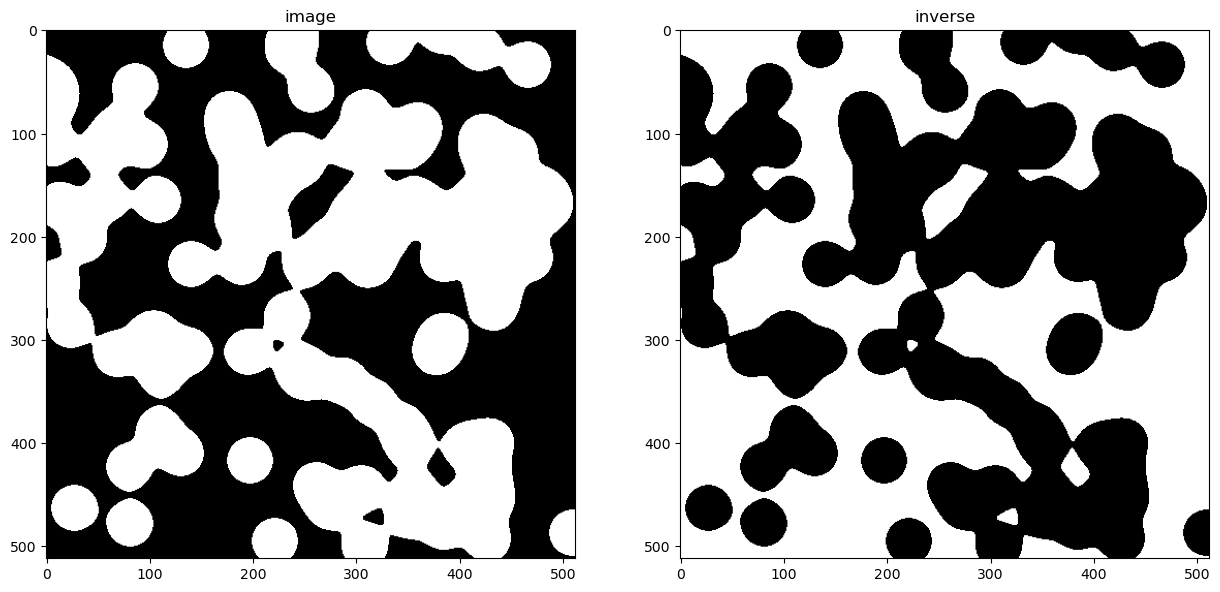

In [20]:
img = data.binary_blobs()
inv = ~img
plt.figure(figsize=(15,15))
plt.subplot(121); plt.imshow(img, cmap='gray'); plt.title('image')
plt.subplot(122); plt.imshow(inv, cmap='gray'); plt.title('inverse')

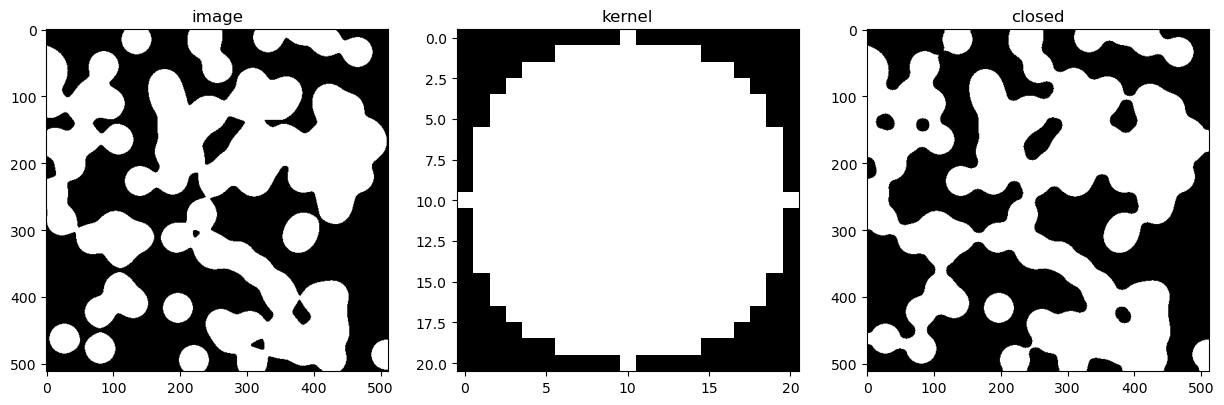

In [21]:
# img = data.binary_blobs()
h = morphology.disk(10)

plt.figure(figsize=(15,15))

plt.subplot(131); plt.imshow(img, cmap='gray'); plt.title('image')

plt.subplot(132); plt.imshow(h, cmap='gray'); plt.title('kernel')

closed = morphology.binary_closing(img, h)
plt.subplot(133); plt.imshow(closed, cmap='gray'); plt.title('closed')

plt.show()

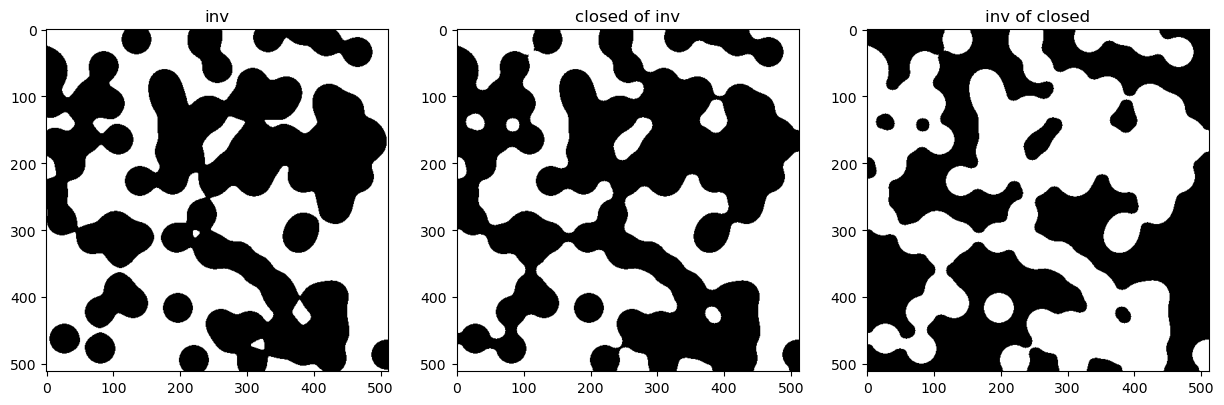

In [22]:
h = morphology.disk(10)

plt.figure(figsize=(15,15))

plt.subplot(131); plt.imshow(inv, cmap='gray'); plt.title('inv')

closed = morphology.binary_opening(inv, h)
plt.subplot(132); plt.imshow(closed, cmap='gray'); plt.title('closed of inv')

plt.subplot(133); plt.imshow(~closed, cmap='gray'); plt.title('inv of closed')

plt.show()

## Exercice 4
Faire une ouverture sur différent niveau de gris pour retirer la majorité des petites étoiles

0.0 255.0


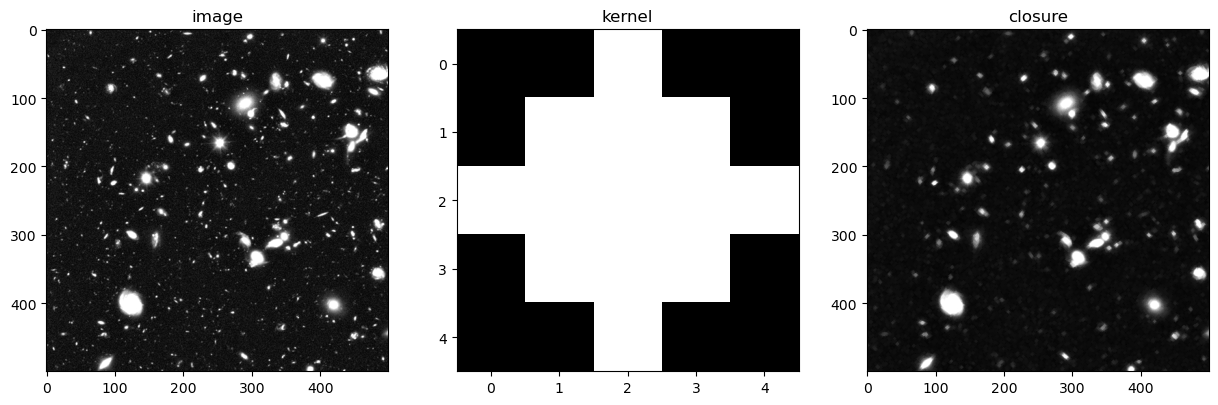

In [29]:
img = data.hubble_deep_field().mean(axis=2)[:500, :500]
h = morphology.disk(2)

plt.figure(figsize=(15,15))

plt.subplot(131); plt.imshow(img, cmap='gray'); plt.title('image')

plt.subplot(132); plt.imshow(h, cmap='gray'); plt.title('kernel')

closed = morphology.opening(img, h)
plt.subplot(133); plt.imshow(closed, cmap='gray'); plt.title('closure')

plt.show()

## Exercice 5
Appliquer un filtre Top-Hat afin de récupérer les étoiles retirer de l'image suite à l'ouverture.
> https://scikit-image.org/docs/dev/auto_examples/filters/plot_tophat.html

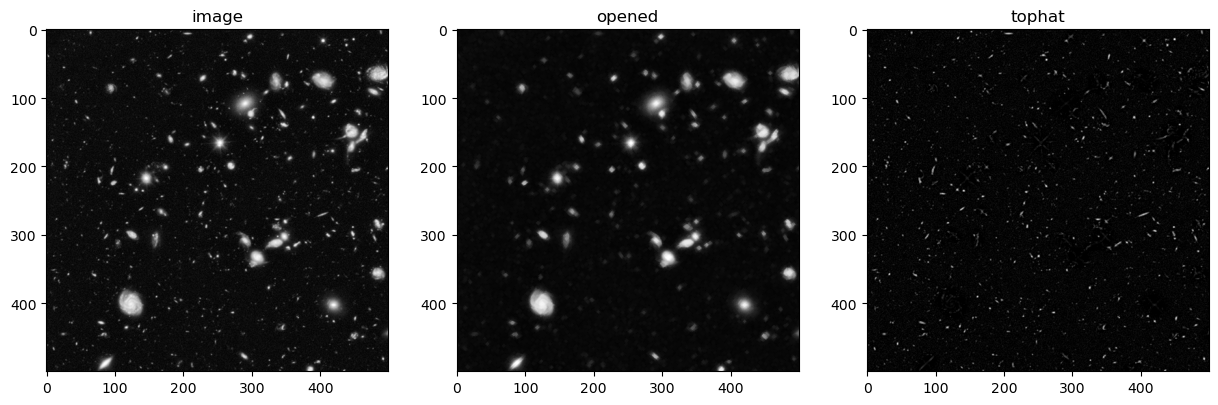

In [31]:
img = data.hubble_deep_field().mean(axis=2)[:500, :500]

plt.figure(figsize=(15,15))

plt.subplot(131); plt.imshow(img, cmap='gray'); plt.title('image')

h = morphology.disk(2)

opened = morphology.opening(img, h)
tophat = img - opened

plt.subplot(132); plt.imshow(opened, cmap='gray'); plt.title('opened')

plt.subplot(133); plt.imshow(tophat, cmap='gray'); plt.title('tophat')

plt.show()